In [1]:
import shap
import numpy as np
import xgboost as xgb
from auxiliary_functions import load_joblib
from explainability import time_series_plot, time_series_desc, box_plot, shap_exp, corr_matrix, interactive_plot, shap_exp_overall
shap.initjs()

/opt/anaconda3/envs/Data_Science_2024/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the model and data
lag = 10
path_to_read1 = '/Users/luisescobar/Documents/Thesis/DataSets/Dictionary/03_01_Train_Val_Test'
#path_to_read2 = f'/Users/luisescobar/Documents/Thesis/Models/original/lag_{lag}min'
path_to_read2 = '/Users/luisescobar/Documents/Thesis/Models/GPT_exp/hard_voting/RF'
filename_model = 'rf_model.pkl'
filename_clot = 'blocking_20.pkl'
filename_noclot = 'no_blocking_20.pkl'

filename_scaler = 'scaler.pkl'



clot_dict = load_joblib(path_to_read1, filename_clot)
no_clot_dict = load_joblib(path_to_read1, filename_noclot)
model_loaded = load_joblib(path_to_read2, filename_model)
scaler_loaded = load_joblib(path_to_read2, filename_scaler)



working_class = 1 #must be 1 (clot)/ 0 (non-clot)


In [3]:
#Choose arbitrary a dataset from the blocking class
if working_class == 1:
    print(clot_dict.keys())
    dict_eval = clot_dict
elif working_class == 0:
    print(no_clot_dict.keys())
    dict_eval = no_clot_dict

dict_keys(['df_1', 'df_923', 'df_680-df_681-concat', 'df_654', 'df_311', 'df_344-df_345-df_346-concat', 'df_902', 'df_486', 'df_513', 'df_62', 'df_653', 'df_783', 'df_790', 'df_247', 'df_190', 'df_751', 'df_764', 'df_859', 'df_115'])


# 1. Statistical analysis

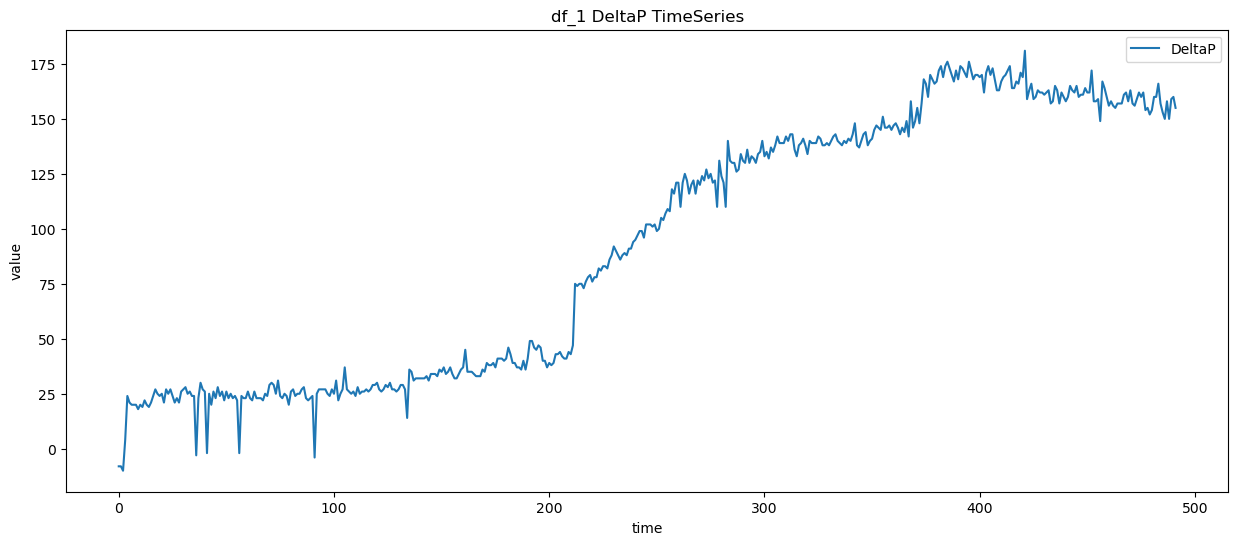

In [5]:
time_series_plot('df_1', dict_eval, 'DeltaP')

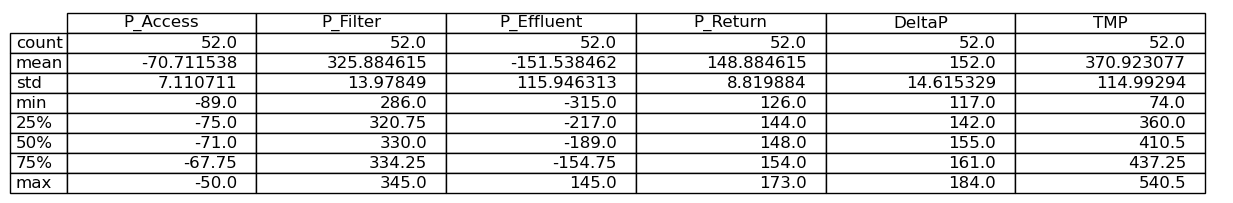

In [14]:
export = 1 #Must be 0 or 1
columns = ['P_Access', 'P_Filter', 'P_Effluent','P_Return','DeltaP', 'TMP']
trt = 'df_902'
time_series_desc(trt, clot_dict, export, columns, 1)

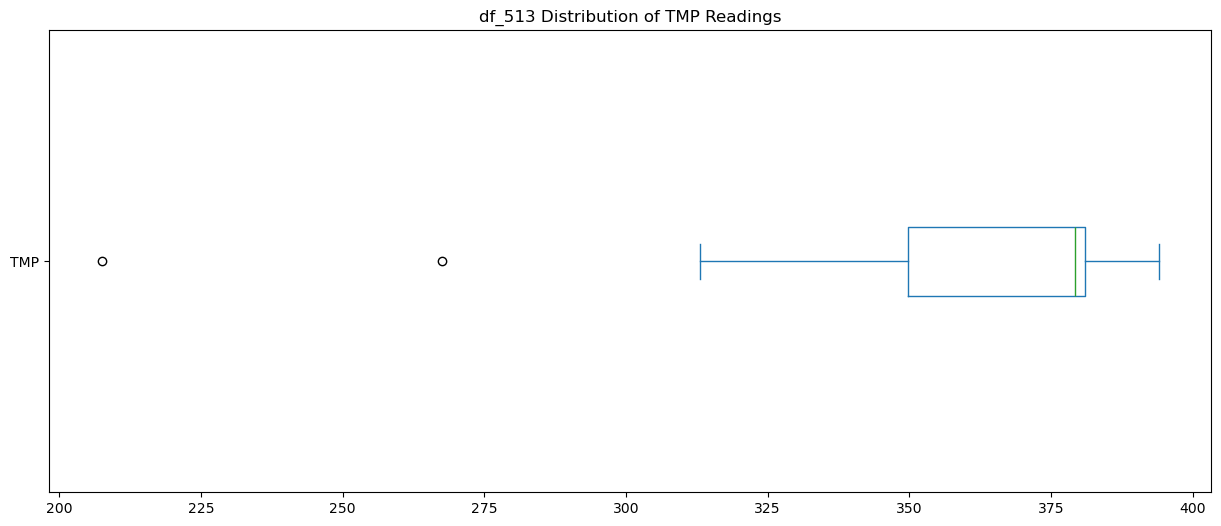

In [33]:
box_plot('df_513', clot_dict, 'TMP', 1)

# 2. Explainability (SHapley Additive exPlanations)

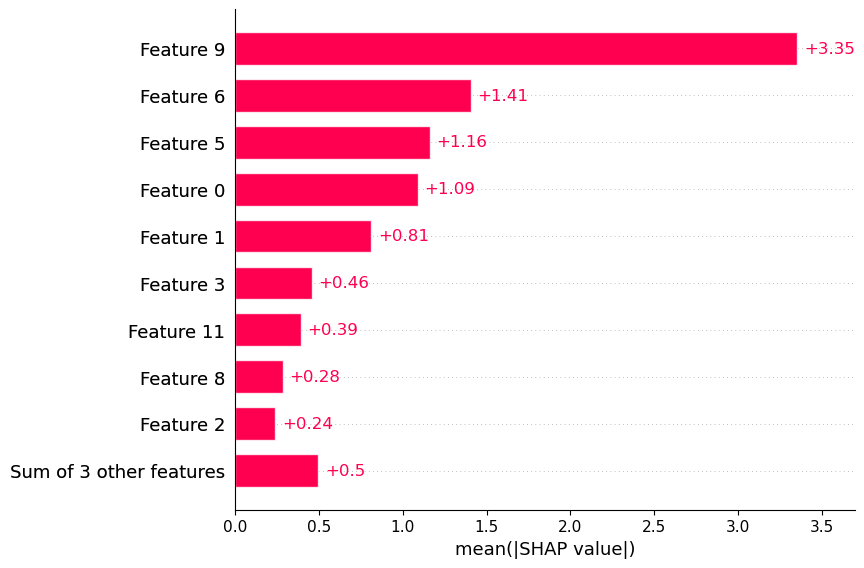

In [6]:
params = {
    "trt": "df_1",
    "clot_dict": clot_dict,
    "lag": lag,
    "scaler_loaded": scaler_loaded,
    "model_loaded": model_loaded,
    "shap_method": "absolute mean",
    "feature" : 'None'
}
plot, shap_values = shap_exp(params)
plot


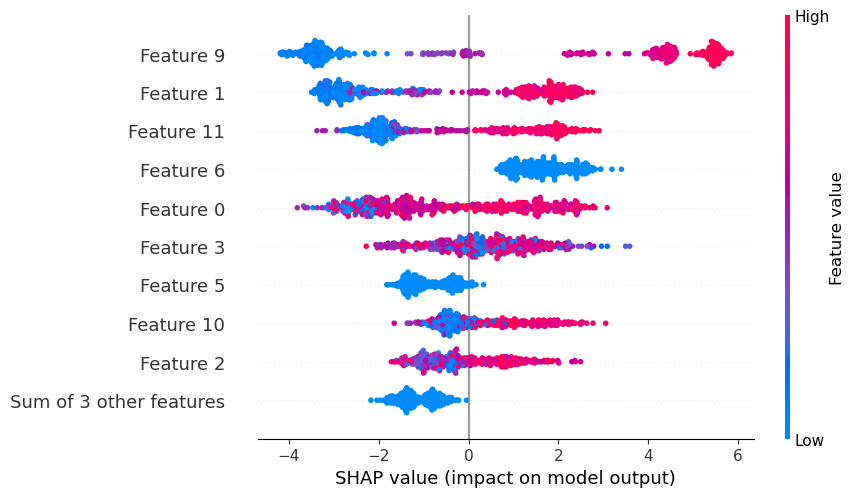

In [4]:
params = {
    "trt": "df_1",
    "clot_dict": clot_dict,
    "lag": lag,
    "scaler_loaded": scaler_loaded,
    "model_loaded": model_loaded,
    "shap_method": "beeswarm",
    "feature" : 'None'
}
shap_exp(params)

In [ ]:
params = {
    "clot_dict": clot_dict,
    "no_clot_dict": no_clot_dict,
    "lag": lag,
    "scaler_loaded": scaler_loaded,
    "model_loaded": model_loaded,
    "shap_method": "beeswarm",
    "feature" : 'None'
}
shap_exp_overall(params)

# 3. Heatmap

<Axes: >

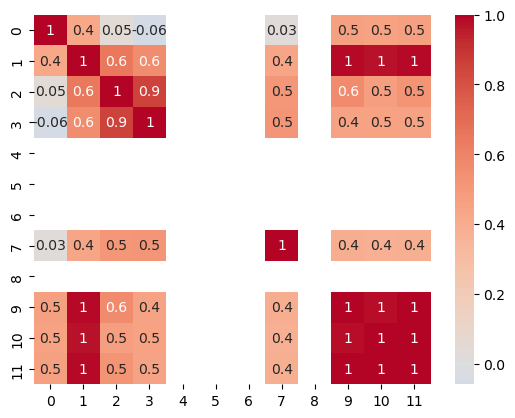

In [3]:

features = ['P_Access ', 'P_Filter', 'P_Effluent', 'P_Return', 'Q_Blood_Pump', 
           'Q_Replacement', 'Q_Dialysate', 'Q_PBP', 'Q_Fluid_Removal', 
           'DeltaP', 'TMP', 'TMPa']

params = {
    "trt": "df_1",
    "clot_dict": clot_dict,
    "lag": lag,
    "scaler_loaded": scaler_loaded,
    "features" : features
} 

corr_matrix(params)

# 4. Tree visualization 

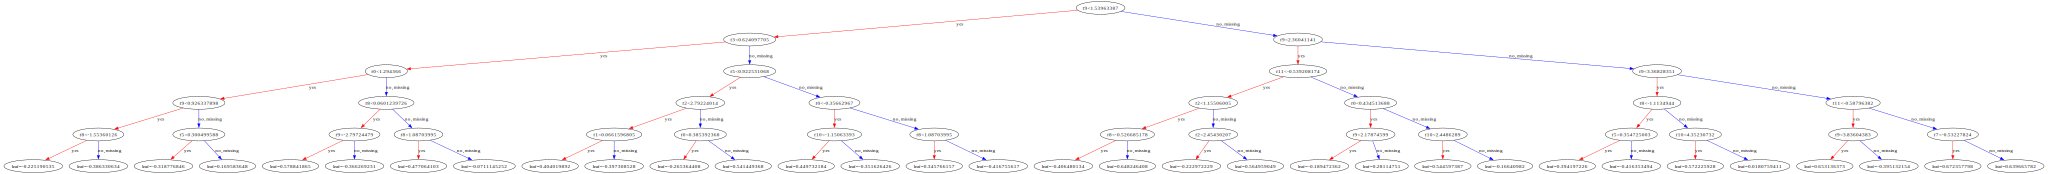

In [3]:
# Visualize the first tree in Graphviz format
graphviz_tree = xgb.to_graphviz(model_loaded, num_trees=0)
graphviz_tree.render("tree0")  # Saves to file 'tree0'

# Display the tree inline if running in Jupyter
graphviz_tree

### Activation function

In [ ]:

xgboost_out = -0.2
probability = 1/(1+np.exp(-xgboost_out))
print(probability)

0.45016600268752216


# 5. Microscopic inspection 

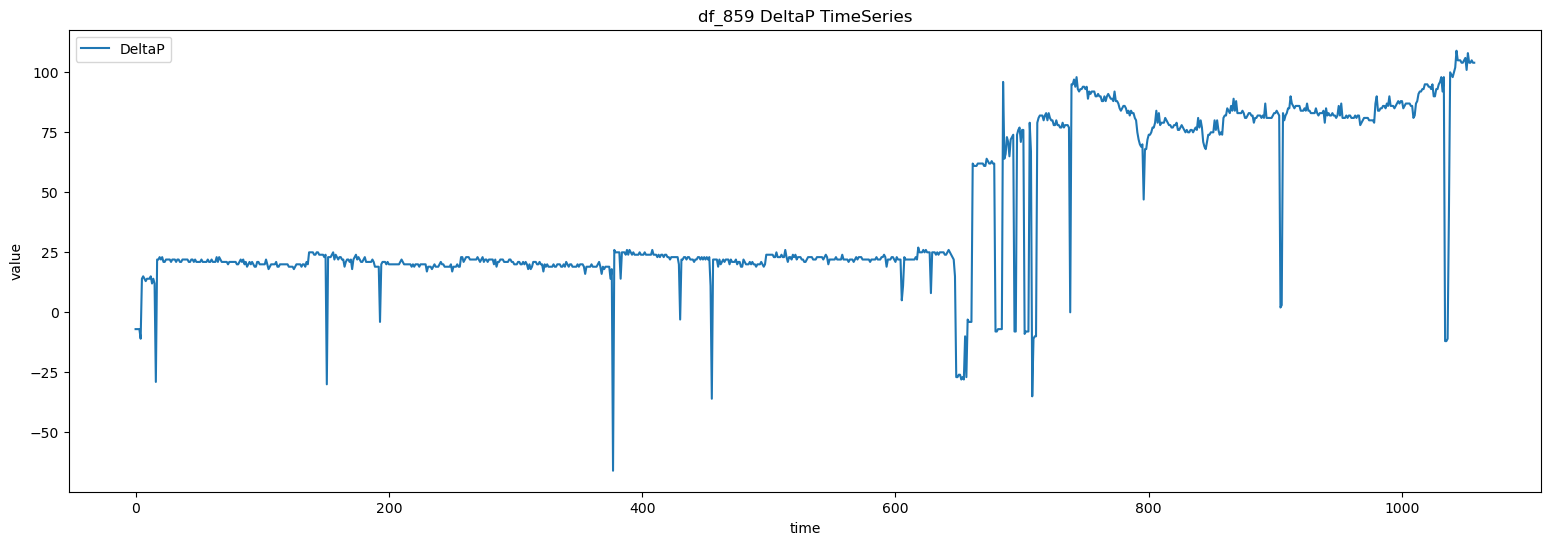

In [4]:
columns = ['P_Access', 'P_Filter', 'P_Effluent', 'P_Return', 'Q_Blood_Pump', 
        'Q_Replacement', 'Q_Dialysate', 'Q_PBP', 'Q_Patient_Fluid_Removal', 
        'DeltaP', 'TMP', 'TMPa']

trt = 'df_859'
pred_values = [1,1,1] # Corresponding to [y_true, y_pred, y_pred_reg], 1 to show it 0 to not
feat_to_plot = ['DeltaP', 'TMP']

params = {
    "trt": trt,
    "clot_dict": clot_dict,
    "lag": lag,
    "scaler_loaded": scaler_loaded,
    "model_loaded": model_loaded,
    "columns": columns,
    "pred_values": pred_values,  
    "scaler": "None",
    "feat_to_plot": feat_to_plot 
} 

interactive_plot(params)
time_series_plot(trt, dict_eval, 'DeltaP')

# 6. Microscopic comparisson